In [1]:
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt 

In [2]:
plt.rcParams.update({'font.size': 18}) 

In [3]:
df = pd.read_csv('AEP_hourly_Sep2012.csv', sep=',')

df['energy'] = df['energy']/100

df.index = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')


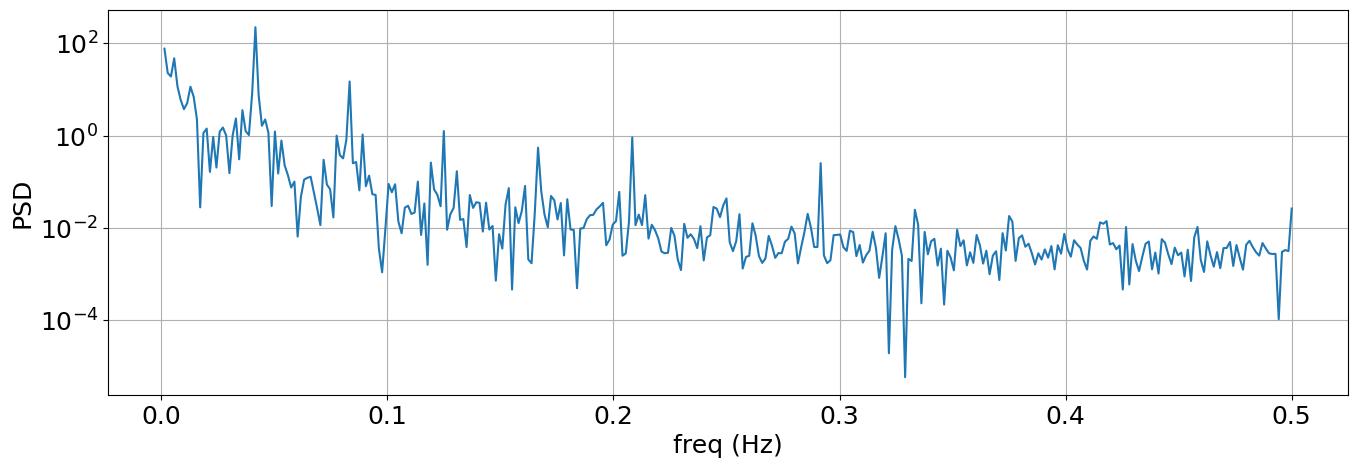

In [4]:
freq, Pxx_spec = signal.periodogram( \
    df['energy'].values, scaling='spectrum')

plt.figure(figsize=(16,5), dpi = 100)

plt.plot(freq[1:],Pxx_spec[1:])

plt.xlabel('freq (Hz)')
plt.ylabel('PSD')
plt.yscale('log')
plt.grid()


In [5]:
def getMaxPeriodogram(freq, Pxx_spec, f1,f2):
    # find the frequencies within the given bounds
    mask = (freq>f1) & (freq<f2)

    # extract the maximum PSDs within the bounds
    maxPsd = max(Pxx_spec[mask])

    # extract the the frequencies with mamixum PSDs
    freqMax = freq[Pxx_spec==maxPsd]

    periodMax = 1/freqMax

    return({'Maximum PSD' :maxPsd, \
            'Frequency' : freqMax[0], \
            'Period' : periodMax[0]})

In [6]:
print(getMaxPeriodogram(freq ,Pxx_spec, 0.002, 0.02))

{'Maximum PSD': 47.75508444001595, 'Frequency': 0.005747126436781609, 'Period': 174.0}


In [7]:
print(getMaxPeriodogram(freq, Pxx_spec, 0.001, 0.06))

{'Maximum PSD': 224.6538276823668, 'Frequency': 0.041666666666666664, 'Period': 24.0}
